Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                128       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4353 (17.00 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Start
Epoch[200/2000], Total Loss: 0.025932, Func Loss: 0.000377, Deriv Loss: 0.025555
Epoch[400/2000], Total Loss: 0.000908, Func Loss: 0.000002, Deriv Loss: 0.000905
Epoch[600/2000], Total Loss: 0.000254, Func Loss: 0.000001, Deriv Loss: 0.000253
Epoch[800/2000], Total Loss: 0.0001

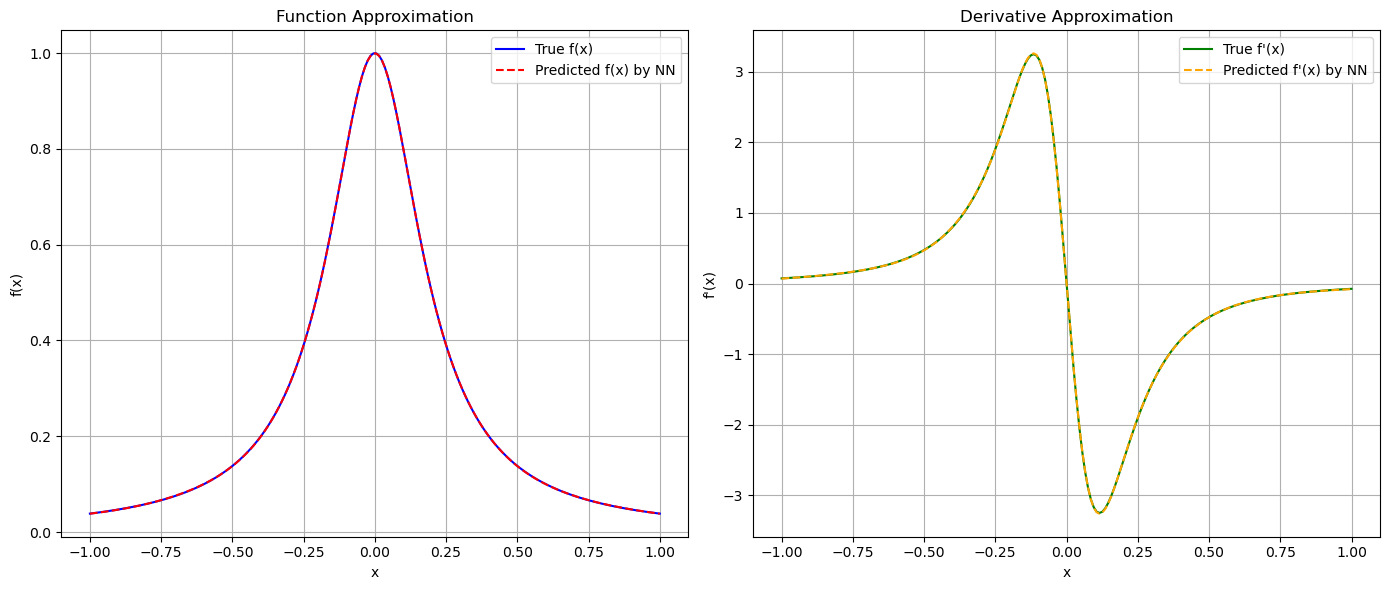

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


def func(x):
    return 1 / (1 + 25 * x**2)

def deriv(x):
    return (-50 * x) / ((1 + 25 * x**2)**2)

x_data = np.linspace(-1, 1, 200).reshape(-1, 1).astype('float32')
y_data = func(x_data)
y_deriv_data = deriv(x_data)

x_tensor = tf.convert_to_tensor(x_data)
y_tensor = tf.convert_to_tensor(y_data)
y_deriv_tensor = tf.convert_to_tensor(y_deriv_data)

model = Sequential([

    Dense(64, activation='tanh', input_shape=(1,)),
    Dense(64, activation='tanh'),
 
    Dense(1, activation='linear')
])

model.summary() 

optimizer = Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError()
epochs = 2000 

print("Start")
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        
        with tf.GradientTape() as deriv_tape:
            deriv_tape.watch(x_tensor)
           
            y_pred = model(x_tensor, training=True)
        
        
        dy_dx_pred = deriv_tape.gradient(y_pred, x_tensor)
         
        loss_func = mse(y_tensor, y_pred)
        loss_deriv = mse(y_deriv_tensor, dy_dx_pred)
        
        
        total_loss = loss_func + loss_deriv
        
   
    grads = tape.gradient(total_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    if (epoch + 1) % 200 == 0:
        print(f"Epoch[{epoch+1}/{epochs}], Total Loss: {total_loss.numpy():.6f}, "
              f"Func Loss: {loss_func.numpy():.6f}, Deriv Loss: {loss_deriv.numpy():.6f}")

print("Finish！")


# 預測
y_pred_final = model.predict(x_tensor)

with tf.GradientTape() as final_tape:
    final_tape.watch(x_tensor)
    y_pred_for_deriv = model(x_tensor)
dy_dx_pred_final = final_tape.gradient(y_pred_for_deriv, x_tensor)



plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.plot(x_data, y_data, label="True f(x)", color="blue")
plt.plot(x_data, y_pred_final, label="Predicted f(x) by NN", color="red", linestyle='--')
plt.title("Function Approximation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(x_data, y_deriv_data, label="True f'(x)", color="green")
plt.plot(x_data, dy_dx_pred_final, label="Predicted f'(x) by NN", color="orange", linestyle='--')
plt.title("Derivative Approximation")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()